# Homework 2

## Your Name Here (or your names here if you are pair programming)

 - Student Name: Erika Noda
 - Student UT EID: edn427


 - Partner Name: Victor Fonseca
 - Partner UT EID: VRF262

## Practicing Pandas


In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Social Network Dataset

In this assignment we work with a social network dataset.

You have 5 tables to work on.

1. **person_knows_person**
This table represents the friendship between users. A person can have many friends. Persons have unique integer id number.

2. **person_likes_post_file**
This tables represents user likes. A person and a post is represented by IDs.

3. **post_hasCreator_person**
A person creates many posts. Each post has a unique creator person id.

4. **comment_replyOf_post**
This table represents comments on posts. Both post and comments have unique ids.

5. **comment_hasCreator_person**
A user can comment on posts. Each comment has a unique creator person id.


In [2]:
url = "https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/main/datasets/social-media/"

person_knows_person_file = url + "person_knows_person.csv"
person_likes_post_file = url + "person_likes_post.csv"
post_hasCreator_person_file = url + "post_hasCreator_person.csv"
comment_replyOf_post_file = url + "comment_replyOf_post.csv"
comment_hasCreator_person_file = url + "comment_hasCreator_person.csv"

person_knows_person = pd.read_csv(person_knows_person_file,  sep='|')
person_likes_post = pd.read_csv(person_likes_post_file,  sep='|')
post_hasCreator_person = pd.read_csv(post_hasCreator_person_file,  sep='|')
comment_replyOf_post = pd.read_csv(comment_replyOf_post_file, sep='|')
comment_hasCreator_person = pd.read_csv(comment_hasCreator_person_file,  sep='|')

print(person_knows_person.head(5))
print("-------------------------")

print(person_likes_post.head(5))
print("-------------------------")

print(post_hasCreator_person.head(5))
print("-------------------------")

print(comment_replyOf_post.head(5))
print("-------------------------")

print(comment_hasCreator_person.head(5))
print("-------------------------")

   Person.id  Person.id.1
0         38          956
1         38          962
2         38          941
3         38           74
4         38           36
-------------------------
   Person.id  Post.id          creationDate
0         74        0  2012-10-15T05:13:41Z
1         36        0  2012-10-18T10:51:39Z
2        417       10  2012-11-18T11:14:47Z
3        415       10  2012-11-20T06:30:22Z
4        109       10  2012-11-19T11:03:52Z
-------------------------
   Post.id  Person.id
0        0         38
1       10         38
2       20         38
3       30         38
4       40         38
-------------------------
   Comment.id  Post.id
0           0        0
1          10        0
2          30        0
3          70        0
4         100       10
-------------------------
   Comment.id  Person.id
0           0         74
1          10        832
2          20        913
3          30        457
4          40        956
-------------------------


# Question - 1. Who are the top-10 users who have the highest number of friends? (4 points)
Count up the number of friends of each user and provide the top-10 of this number of friend count list. Print out their user IDs.

In [3]:
# Code here
q1=person_knows_person['Person.id'].value_counts()
tenIds=q1[:10].index
print(tenIds)


Index([336, 959, 40, 430, 811, 296, 938, 804, 165, 323], dtype='int64', name='Person.id')


# Question - 2. Who wrote the most liked post?  (4 points)
Count up the number of likes for each post and find out who wrote that post.
Print out the user id. If there are multiple maximum print them all.

In [4]:
#See what posts have max number of likes
q2 = person_likes_post['Post.id'].value_counts()
#max likes appears to be 9 likes
#Get all posts with 9 likes
all_max = q2[q2 == q2.max()]
all_max=list(all_max.index)
#Only find persons with posts in the postsWith9Likes list
only=post_hasCreator_person[post_hasCreator_person['Post.id'].isin(all_max)]
#Drop duplicate users
only=only.drop_duplicates(subset="Person.id", keep="first")
only["Person.id"].tolist()

[38,
 941,
 347,
 495,
 884,
 336,
 405,
 135,
 587,
 863,
 43,
 875,
 861,
 422,
 514,
 746,
 728,
 548,
 825,
 402,
 109,
 557,
 72,
 627,
 790,
 463,
 838,
 65,
 357,
 52,
 427,
 193,
 629,
 232,
 186,
 197,
 585,
 429,
 28,
 732,
 318,
 635,
 393,
 654,
 105,
 659,
 189,
 643,
 668,
 556,
 383,
 532,
 326,
 970,
 717,
 900,
 910,
 239,
 524,
 396,
 224,
 795,
 262,
 91,
 711,
 348,
 153,
 663,
 996,
 473,
 415,
 842,
 762,
 86,
 731,
 919,
 685,
 505,
 353,
 965,
 712,
 945,
 564,
 122,
 959,
 997,
 36,
 510,
 278,
 675,
 13,
 275,
 568,
 221,
 73,
 669,
 408,
 483,
 844,
 517,
 544,
 118,
 48,
 370,
 976,
 609,
 156,
 102,
 333,
 770,
 569,
 630,
 451,
 542,
 911,
 430,
 83,
 979,
 896,
 297,
 394,
 182,
 828,
 882,
 878,
 529,
 819,
 3,
 149,
 78,
 319,
 180,
 683,
 938,
 951,
 5,
 434,
 572,
 157,
 886,
 785,
 613,
 229,
 980,
 778,
 4,
 476,
 491,
 11,
 715,
 942,
 280,
 835,
 986,
 661,
 834,
 545,
 780,
 674,
 858,
 876,
 658,
 464,
 929,
 960,
 325,
 618,
 888,
 693,
 921,
 

# Question - 3. Who wrote the most influential post? The most influential post is the most discussed and most liked post. (4 points)

**Tip:** First, count up the number of comments and likes that each post has. Then find out which post it is, and finally find out who wrote that.
Print out one user id.
If there is a tie, print out the ***one***  at the tope of the list.


In [15]:
# Code here
# determine the number of likes for each post
likes_df = person_likes_post[['Person.id', 'Post.id']]
likes_df = likes_df.groupby('Post.id').count().sort_values(by='Person.id', ascending=False)
likes_df


,Person.id
Post.id,
355680,9
1074970,9
128640,9
128650,9
401970,9
...,...
590840,1
590850,1
590870,1


In [16]:
# determine the number of comments for each post
comm_df = comment_replyOf_post.groupby('Post.id').count().sort_values(by='Comment.id', ascending=False)
comm_df

,Comment.id
Post.id,
445970,11
618370,10
1335410,10
675790,10
1289550,10
...,...
921050,1
1329820,1
516150,1


In [20]:
# merge the dataframes and determine total engagement
engage_df = likes_df.merge(comm_df, how='outer', on='Post.id')
engage_df.sort_values(by=['Person.id'], inplace=True, ascending=False)
engage_df.fillna(0, inplace=True)
engage_df.columns = ['Nlikes', 'Ncomments']

# check to make sure that merge is correct and sorted in descending order of likes based on the original likes_df
engage_df

,Nlikes,Ncomments
Post.id,,
355680,9.0,0.0
1074970,9.0,0.0
128640,9.0,2.0
128650,9.0,4.0
401970,9.0,0.0
...,...,...
1733580,0.0,5.0
1733590,0.0,3.0
1733600,0.0,5.0


In [25]:
# find the top posts with maximum engagement
engage_df['Total'] = engage_df['Nlikes'] + engage_df['Ncomments']
engage_df.sort_values(by=['Total'], inplace=True, ascending=False)
print('Most engagement:', engage_df['Total'].max())
max_engage = engage_df[engage_df['Total'] == engage_df['Total'].max()]
max_engage

Most engagement: 18.0


,Nlikes,Ncomments,Total
Post.id,,,
888610,9.0,9.0,18.0
518820,9.0,9.0,18.0
1246220,9.0,9.0,18.0
801730,9.0,9.0,18.0
1424730,9.0,9.0,18.0
727200,9.0,9.0,18.0


In [33]:
# find the top creators using the top posts list
top_posts = max_engage.index.tolist()
top_creators = post_hasCreator_person.loc[post_hasCreator_person['Post.id'].isin(top_posts), 'Person.id'].tolist()
print('top creator IDs:', top_creators)

top creator IDs: [325, 649, 794, 245, 15, 23]


# Question - 4. Create two histograms for the distributions of the number of likes and comments that users have created. (4 points)
Describe the shape of these data two data distributions.

**Tip:** First perpare two lists of number of likes and number of comments that users have done. You need to count up how many likes and how many comments each unique user id has.

Text(0.5, 1.0, 'Count of Users who make comments')

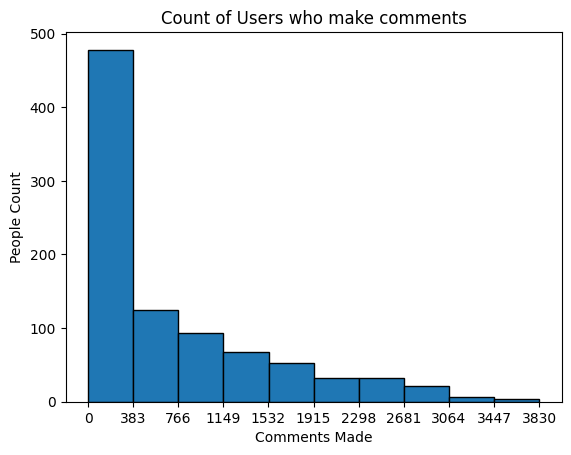

In [27]:
# Code here
comments= comment_hasCreator_person.groupby('Person.id')["Comment.id"].count()
#comments.sort_values(ascending=False,inplace=True)
comments=pd.DataFrame(comments)
plt.hist(comments['Comment.id'], bins=10, edgecolor='black')
plt.xticks(ticks=range(0,4000,383))
plt.xlabel('Comments Made')
plt.ylabel('People Count')
plt.title('Count of Users who make comments')

# Most users have commented between 0-383 times. With less and less users making more comments.
# Right skewed shape.

Text(0.5, 1.0, 'Count of Users who Produce Likes')

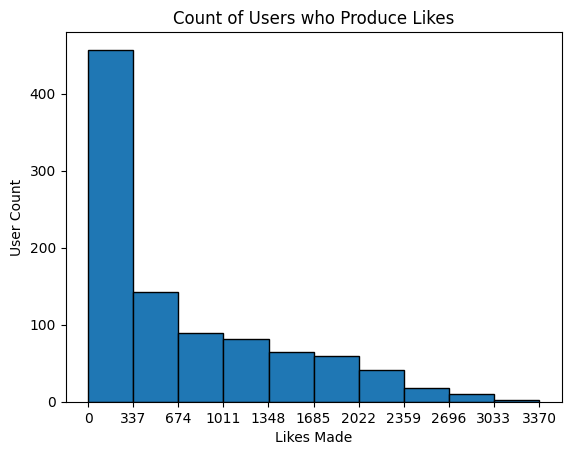

In [36]:
# Likes
likes=person_likes_post.groupby('Person.id')['Post.id'].count()
likes=pd.DataFrame(likes)
plt.hist(likes['Post.id'],bins=10,edgecolor='black')
plt.xticks(ticks=range(0,3500,337))
plt.xlabel("Likes Made")
plt.ylabel('User Count')
plt.title('Count of Users who Produce Likes')

#Most Users make between 0 and 337 likes. With less users making more likes.
# Right skewed shape. 

# Question - 5. What is the Pearson correlation coefficient between the number of comments and the number of likes that users do on the social network? (4 points)

Print out one number.



**Tip:** You can calculate correlation coefficient using the following formula:
Assume that x and y are two arrays of data, in this case number of likes and comments of each user. n is the number of users.

**Bonus Tip:** Consider that some users might have liked posts, but not liked any comments, or vice versa.

You can use whichever technique you would like for the question, as long as it has been discussed in lecture.




\begin{align*}
r= {{ n(\sum x y ) - (\sum x ) (\sum y)    } \over { \sqrt{ [ n \sum x^2  -
(\sum x)^2 ] [ n\sum y^2 - (\sum y )^2 ] } } }
\end{align*}











In [36]:
# determine the number of likes given by each user
user_likes = person_likes_post[['Person.id', 'Post.id']]
user_likes = user_likes.groupby('Person.id').count().sort_values(by='Post.id', ascending=False)
user_likes.columns = ['like_count']
user_likes

,like_count
Person.id,
565,3371
562,3133
814,2986
804,2977
296,2977
...,...
747,1
489,1
730,1


In [37]:
# determine the number of comments given by each user
user_comm = comment_hasCreator_person.groupby('Person.id').count().sort_values(by='Comment.id', ascending=False)
user_comm.columns = ['comm_count']
user_comm

,comm_count
Person.id,
135,3830
953,3678
959,3585
922,3555
40,3419
...,...
412,1
949,1
952,1


In [38]:
# merge user likes and comments dataframes
print(comment_hasCreator_person.shape)
print(comment_replyOf_post.shape)

(632042, 2)
(224122, 2)
